# APOKASC3

Imports, settings, useful functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MultipleLocator
import utils

In [2]:
# Update matplotlib defaults
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (5, 3.5),
    # 'font.family': 'STIXgeneral',
    # 'mathtext.fontset': 'cm',
})

In [3]:
a3data = pd.read_csv('../data/MainTable.APOKASC3Catv1', sep='\\s+')
a3data

,KIC,Evol_State,ES_Source,Cat_Tab,Seis_Source,Spec_Source,N_Numax_Fil,N_DNu_Fil,Nquar,Numax,...,S_[N/Fe],InvR_Gaia,S_InvR_Gaia,Age_Cat,Age_RGB,S_Age_RGB+,S_Age_RGB-,Age_RC/AGB,S_Age_RC+,S_Age_RC-
0,893214,RGB,Seis,Gold,WAvg,DR17,8,5,15,40.5841,...,0.0164,0.0824,0.0029,RGB,2.9393,0.2980,-0.2639,2.9393,0.2980,-0.2639
1,1026180,RC,Spec,Gold,WAvg,DR17,8,5,4,35.6089,...,0.0107,0.0856,0.0022,RC,-9999.9000,-9999.9000,-9999.9000,3.1878,0.2754,-0.1905
2,1026309,RGB,Seis,Silver,WAvg,DR17,8,4,18,16.6974,...,0.0110,0.0479,0.0012,RGB/AGB,0.5952,0.1481,-0.1090,0.7212,0.1832,-0.1405
3,1026452,RC,Seis,Gold,WAvg,DR17,8,5,18,34.3652,...,0.0222,0.0759,0.0038,RC,-9999.9000,-9999.9000,-9999.9000,2.6999,0.2319,-0.1919
4,1027110,RGB,Seis,Silver,WAvg,DR17,8,4,18,6.5198,...,0.0131,0.0402,0.0015,RGB/AGB,9.1677,8.0551,-3.8133,6.8348,4.6171,-2.3475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15803,12834184,RGB,Spec,NoDet_Sh,NaN,DR17,1,0,1,-9999.0000,...,0.0140,-9999.0000,-9999.0000,NONE,-9999.9000,-9999.9000,-9999.9000,-9999.9000,-9999.9000,-9999.9000
15804,12884116,RGB,Seis,Gold,WAvg,DR17,9,6,8,50.7865,...,0.0138,0.1155,0.0027,RGB,7.7787,1.0086,-0.7863,7.7787,1.0086,-0.7863
15805,12884661,RC,Spec,Gold,WAvg,DR17,7,5,2,31.3348,...,0.0127,0.0936,0.0029,RC,-9999.9000,-9999.9000,-9999.9000,1.8055,0.1161,-0.0863
15806,12884930,RC,Seis,Gold,WAvg,DR17,9,6,10,37.8680,...,0.0219,0.0943,0.0034,RC,-9999.9000,-9999.9000,-9999.9000,3.3261,0.2900,-0.2246


Define cut between low- and high-alpha sequences

In [4]:
def alpha_cut(feh):
    """
    Function which defines the cut between the low- and high-alpha samples.

    Parameters
    ----------
    feh : array-like

    Returns
    -------
    array-like
        [Alpha/Fe] value at given [Fe/H]
    """
    # condition, if true, if false
    return np.where(feh >= 0.2, 0.05, np.where(feh >= -0.4, 0.08 - 0.15 * feh, 0.14))
    # return np.where(feh >= 0., 0.09, 0.09 - 0.13 * feh)

def alpha_pop(feh, afe):
    """
    Separates the data into low- and high-alpha samples.

    Parameters
    ----------
    feh : float or array-like
    afe : float or array-like

    Returns
    -------
    str
        'High' or 'Low'
    """
    return np.where(afe > alpha_cut(feh), 'High', 'Low')
    
a3data['Alpha_Pop'] = alpha_pop(a3data['[Fe/H]'], a3data['[Alp/Fe]'])

Select RGB & RC "Gold" stars

In [5]:
rgb_gold = a3data[(a3data['Evol_State'] == 'RGB') & (a3data['Cat_Tab'] == 'Gold') & (a3data['Age_Cat'] == 'RGB')]
rgb_gold

,KIC,Evol_State,ES_Source,Cat_Tab,Seis_Source,Spec_Source,N_Numax_Fil,N_DNu_Fil,Nquar,Numax,...,InvR_Gaia,S_InvR_Gaia,Age_Cat,Age_RGB,S_Age_RGB+,S_Age_RGB-,Age_RC/AGB,S_Age_RC+,S_Age_RC-,Alpha_Pop
0,893214,RGB,Seis,Gold,WAvg,DR17,8,5,15,40.5841,...,0.0824,0.0029,RGB,2.9393,0.2980,-0.2639,2.9393,0.2980,-0.2639,Low
5,1027337,RGB,Seis,Gold,WAvg,DR17,9,6,18,74.3689,...,0.1230,0.0033,RGB,5.9743,0.5953,-0.5247,5.9743,0.5953,-0.5247,Low
22,1164301,RGB,Seis,Gold,WAvg,DR17,8,5,15,57.6994,...,0.1268,0.0065,RGB,7.4711,1.1378,-0.9730,7.4711,1.1378,-0.9730,High
30,1294122,RGB,Seis,Gold,WAvg,DR17,9,6,18,75.5526,...,0.1295,0.0029,RGB,3.9948,0.4031,-0.3565,3.9948,0.4031,-0.3565,Low
31,1294385,RGB,Seis,Gold,WAvg,DR17,9,6,18,106.7504,...,0.1522,0.0029,RGB,3.6440,0.3401,-0.3023,3.6440,0.3401,-0.3023,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15793,12737278,RGB,Seis,Gold,WAvg,DR17,8,5,17,173.4092,...,0.1947,0.0041,RGB,5.0981,0.5314,-0.4504,5.0981,0.5314,-0.4504,Low
15794,12783669,RGB,Seis,Gold,WAvg,DR17,8,5,16,51.7927,...,0.1213,0.0039,RGB,8.6468,1.4601,-1.1799,8.6468,1.4601,-1.1799,High
15795,12783857,RGB,Seis,Gold,WAvg,DR17,8,5,18,78.3331,...,0.1384,0.0040,RGB,6.4252,0.8616,-0.7026,6.4252,0.8616,-0.7026,High
15804,12884116,RGB,Seis,Gold,WAvg,DR17,9,6,8,50.7865,...,0.1155,0.0027,RGB,7.7787,1.0086,-0.7863,7.7787,1.0086,-0.7863,Low


In [6]:
rc_gold = a3data[(a3data['Evol_State'] == 'RC') & (a3data['Cat_Tab'] == 'Gold') & (a3data['Age_Cat'] == 'RC')]
rc_gold

,KIC,Evol_State,ES_Source,Cat_Tab,Seis_Source,Spec_Source,N_Numax_Fil,N_DNu_Fil,Nquar,Numax,...,InvR_Gaia,S_InvR_Gaia,Age_Cat,Age_RGB,S_Age_RGB+,S_Age_RGB-,Age_RC/AGB,S_Age_RC+,S_Age_RC-,Alpha_Pop
1,1026180,RC,Spec,Gold,WAvg,DR17,8,5,4,35.6089,...,0.0856,0.0022,RC,-9999.9,-9999.9,-9999.9,3.1878,0.2754,-0.1905,Low
3,1026452,RC,Seis,Gold,WAvg,DR17,8,5,18,34.3652,...,0.0759,0.0038,RC,-9999.9,-9999.9,-9999.9,2.6999,0.2319,-0.1919,Low
8,1160684,RC,Spec,Gold,WAvg,DR17,9,6,17,26.8674,...,0.0866,0.0086,RC,-9999.9,-9999.9,-9999.9,5.2477,0.4989,-0.4825,Low
9,1160789,RC,Seis,Gold,WAvg,DR17,9,6,18,24.8831,...,0.0878,0.0018,RC,-9999.9,-9999.9,-9999.9,13.3123,1.8160,-1.4902,High
11,1161447,RC,Seis,Gold,WAvg,DR17,9,6,8,36.4550,...,0.0823,0.0030,RC,-9999.9,-9999.9,-9999.9,3.5479,0.3191,-0.2570,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15798,12784998,RC,Seis,Gold,WAvg,DR17,8,5,4,34.0536,...,0.0890,0.0018,RC,-9999.9,-9999.9,-9999.9,3.3823,0.3085,-0.2419,Low
15799,12785083,RC,Seis,Gold,WAvg,DR17,10,7,9,28.1868,...,0.0910,0.0023,RC,-9999.9,-9999.9,-9999.9,7.2151,0.7808,-0.8104,High
15802,12833300,RC,Seis,Gold,WAvg,DR17,8,5,4,29.7501,...,0.0926,0.0018,RC,-9999.9,-9999.9,-9999.9,7.9048,0.9279,-0.8770,High
15805,12884661,RC,Spec,Gold,WAvg,DR17,7,5,2,31.3348,...,0.0936,0.0029,RC,-9999.9,-9999.9,-9999.9,1.8055,0.1161,-0.0863,Low


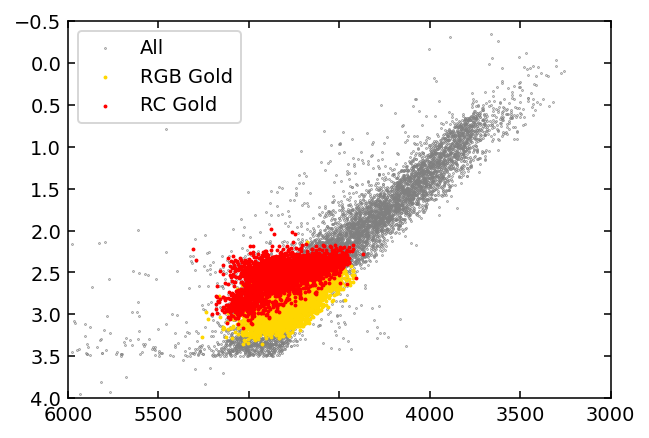

In [7]:
fig, ax = plt.subplots()
ax.scatter(a3data['Teff'], a3data['Logg_Spec'], c='grey', s=0.1, label='All')
ax.scatter(rgb_gold['Teff'], rgb_gold['Logg_Spec'], c='gold', s=1, label='RGB Gold')
ax.scatter(rc_gold['Teff'], rc_gold['Logg_Spec'], c='r', s=1, label='RC Gold')
ax.set_xlim((6000, 3000))
ax.set_ylim((4, -0.5))
ax.legend()
plt.show()

In [8]:
rgb_high_alpha = rgb_gold[rgb_gold['Alpha_Pop'] == 'High']
rgb_low_alpha = rgb_gold[rgb_gold['Alpha_Pop'] == 'Low']
rc_high_alpha = rc_gold[rc_gold['Alpha_Pop'] == 'High']
rc_low_alpha = rc_gold[rc_gold['Alpha_Pop'] == 'Low']

Plot illustrating the low- and high-alpha cut for RGB stars

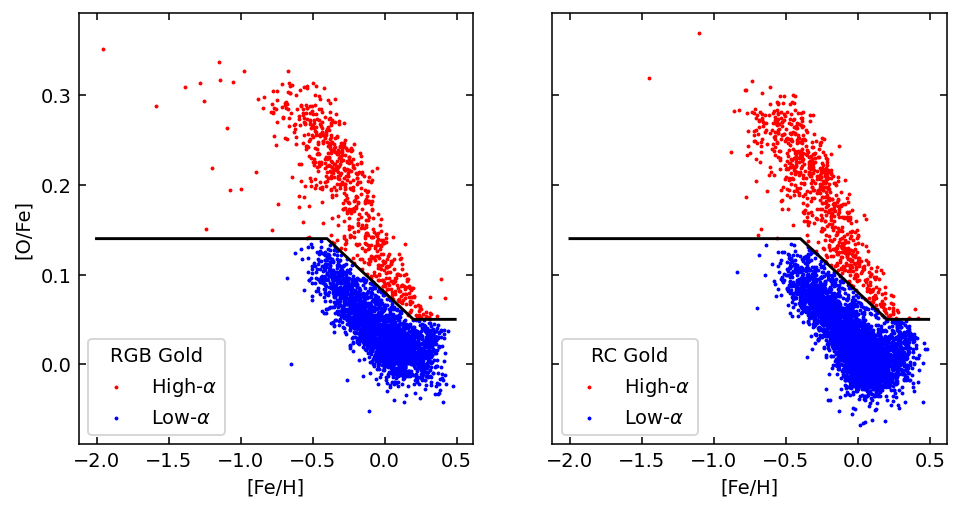

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
feh_arr = np.arange(-2., 0.5, 0.01)
axs[0].plot(feh_arr, alpha_cut(feh_arr), c='k')
axs[0].scatter(rgb_high_alpha['[Fe/H]'], rgb_high_alpha['[Alp/Fe]'], c='r', s=1, marker='o', label=r'High-$\alpha$')
axs[0].scatter(rgb_low_alpha['[Fe/H]'], rgb_low_alpha['[Alp/Fe]'], c='b', s=1, marker='o', label=r'Low-$\alpha$')

axs[1].plot(feh_arr, alpha_cut(feh_arr), c='k')
axs[1].scatter(rc_high_alpha['[Fe/H]'], rc_high_alpha['[Alp/Fe]'], c='r', s=1, marker='o', label=r'High-$\alpha$')
axs[1].scatter(rc_low_alpha['[Fe/H]'], rc_low_alpha['[Alp/Fe]'], c='b', s=1, marker='o', label=r'Low-$\alpha$')

axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
axs[0].legend(title='RGB Gold')
axs[1].legend(title='RC Gold')
plt.show()

[Fe/H] vs Age for RGB stars

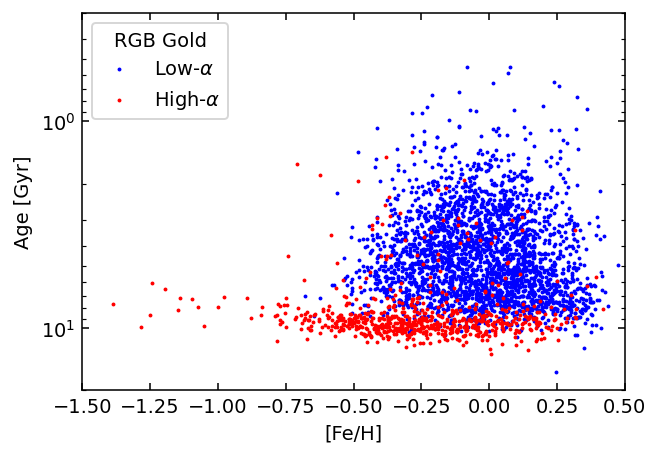

In [10]:
fig, ax = plt.subplots()
ax.scatter(rgb_low_alpha['[Fe/H]'], rgb_low_alpha['Age_RGB'], s=1, c='b', label=r'Low-$\alpha$')
ax.scatter(rgb_high_alpha['[Fe/H]'], rgb_high_alpha['Age_RGB'], s=1, c='r', label=r'High-$\alpha$')
ax.set_xlim((-1.5, 0.5))
ax.set_ylim((20, 0.3))
ax.set_yscale('log')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Age [Gyr]')
ax.legend(title='RGB Gold')
plt.show()

Plot MDFs in bins of age

In [11]:
np.histogram(rgb_low_alpha['Age_RGB'], bins=np.arange(0, 11, 1))

(array([ 18, 147, 359, 426, 391, 392, 346, 277, 155,  48], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [12]:
np.histogram(rc_low_alpha['Age_RC/AGB'], bins=np.arange(0, 11, 1))

(array([315, 614, 560, 600, 517, 456, 434, 272, 150,  46], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

Age_RGB
(1, 2]    Axes(0.125,0.11;0.775x0.77)
(2, 3]    Axes(0.125,0.11;0.775x0.77)
(3, 4]    Axes(0.125,0.11;0.775x0.77)
(4, 5]    Axes(0.125,0.11;0.775x0.77)
(5, 6]    Axes(0.125,0.11;0.775x0.77)
(6, 7]    Axes(0.125,0.11;0.775x0.77)
(7, 8]    Axes(0.125,0.11;0.775x0.77)
(8, 9]    Axes(0.125,0.11;0.775x0.77)
Name: [Fe/H], dtype: object

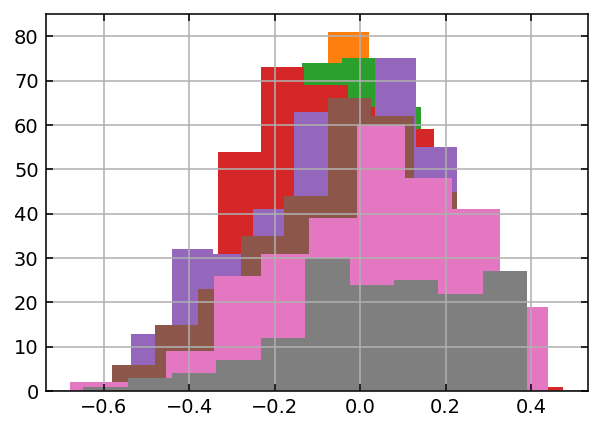

In [13]:
age_bin = pd.cut(rgb_low_alpha['Age_RGB'], np.arange(1, 10, 1))
feh_bin = pd.cut(rgb_low_alpha['[Fe/H]'], np.arange(-0.8, 0.6, 0.1))
# rgb_low_alpha.hist('[Fe/H]', by=age_cut)
rgb_low_alpha.groupby(age_bin, observed=True)['[Fe/H]'].hist()

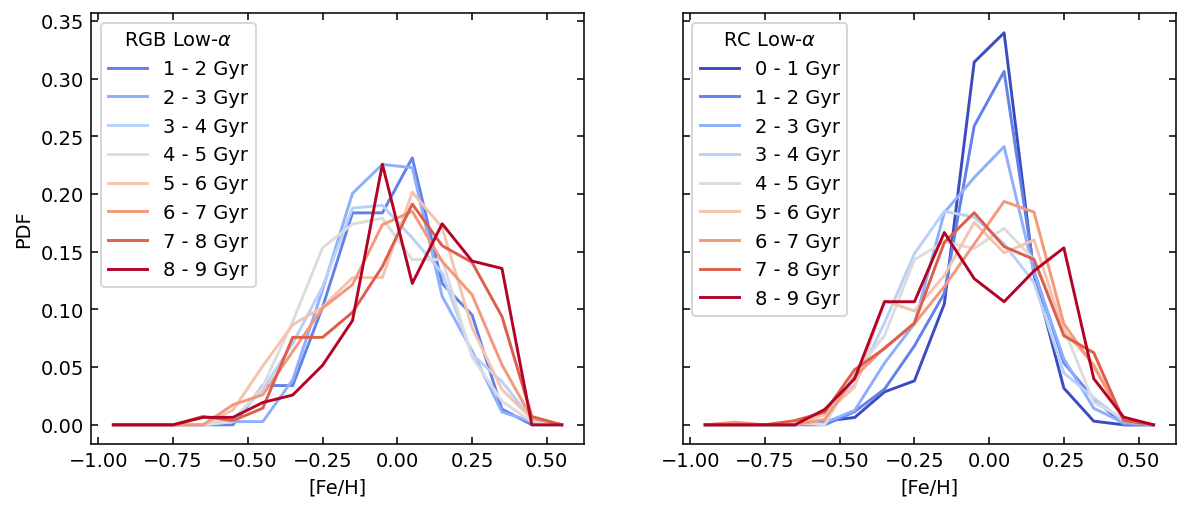

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
# Calculate 2d histogram in age and [Fe/H]
hist2d, xedges, yedges = np.histogram2d(rgb_low_alpha['Age_RGB'], rgb_low_alpha['[Fe/H]'], bins=[np.arange(0, 10, 1), np.arange(-1, 0.61, 0.1)])
# For each bin in age, plot normalized MDF
colors = utils.get_color_list(plt.get_cmap('coolwarm'), xedges)
for i, h in enumerate(hist2d):
    # Skip 0-1 Gyr age bin because it has few RGB stars
    if i == 0:
        continue
    axs[0].plot(utils.get_bin_centers(yedges), h / h.sum(), label='%s - %s Gyr' % tuple(xedges[i:i+2]), c=colors[i])
axs[0].legend(title=r'RGB Low-$\alpha$')


# Same but for RC stars
hist2d, xedges, yedges = np.histogram2d(rc_low_alpha['Age_RC/AGB'], rc_low_alpha['[Fe/H]'], bins=[np.arange(0, 10, 1), np.arange(-1, 0.61, 0.1)])
# For each bin in age, plot normalized MDF
colors = utils.get_color_list(plt.get_cmap('coolwarm'), xedges)
for i, h in enumerate(hist2d):
    axs[1].plot(utils.get_bin_centers(yedges), h / h.sum(), label='%s - %s Gyr' % tuple(xedges[i:i+2]), c=colors[i])
axs[1].legend(title=r'RC Low-$\alpha$')

axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('PDF')
plt.show()

The RC MDFs behave as I expected: narrowest for the youngest stars and broadest for the oldest, with the mode/median not changing much over time. On the other hand, the RGB MDFs get slightly but not substantially broader with age, but they do shift to higher [Fe/H], which is interesting and not what I expected.

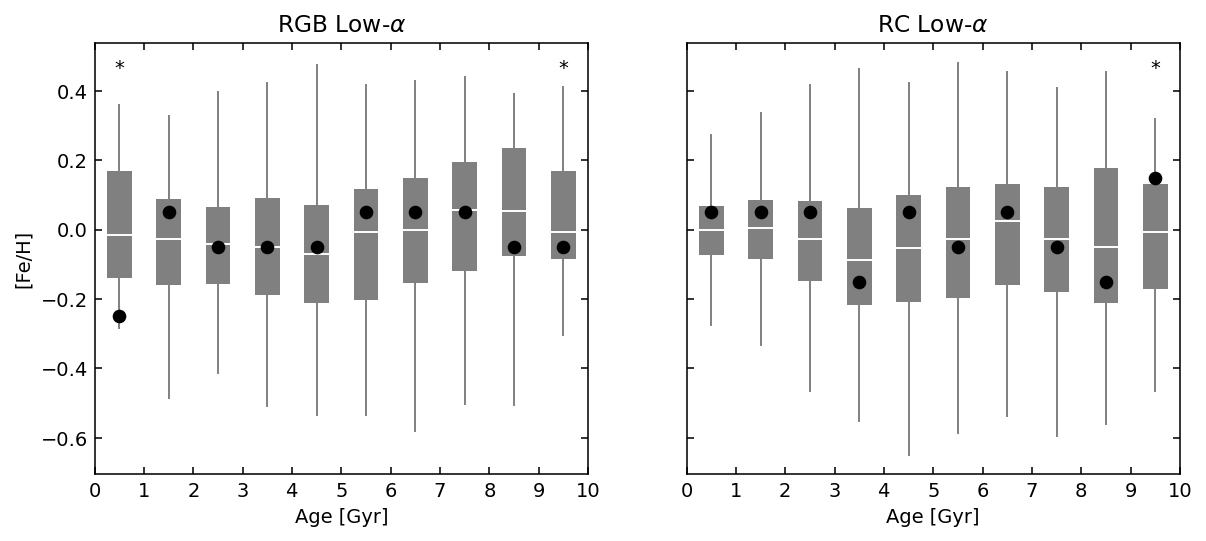

In [15]:
# To do: box-and-whisker plots plus modes for MDFs in each age bin.
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
age_bins = np.arange(0, 11, 1)
age_bin_centers = utils.get_bin_centers(age_bins)
feh_bin_width = 0.1
feh_bins = np.arange(-1, 0.61, feh_bin_width)
feh_bin_centers = utils.get_bin_centers(feh_bins)

def plot_amr(df, ax, age_col='Age_RGB'):
    feh_arr = []
    modes = []
    for i in range(len(age_bins) - 1):
        subset = df[(df[age_col] > age_bins[i]) & (df[age_col] < age_bins[i+1])]
        feh_arr.append(subset['[Fe/H]'])
        # mode
        mdf, bin_edges = np.histogram(subset['[Fe/H]'], bins=feh_bins)
        modes.append(feh_bin_centers[np.argmax(mdf)])
        # indicate bins with few stars
        if subset.shape[0] < 50:
            ax.text(age_bin_centers[i], 0.45, '*', ha='center')
    # box plot
    bplot = ax.boxplot(feh_arr, positions=age_bin_centers, showfliers=False, patch_artist=True,
                       medianprops={'color': 'white'}, whiskerprops={'color': 'gray'},
                       showcaps=False, zorder=0)
    for patch in bplot['boxes']:
        patch.set_facecolor('gray')
        patch.set_edgecolor('none')
    # modes
    ax.plot(age_bin_centers, modes, 'ko', label='Mode')

axs[0].set_title(r'RGB Low-$\alpha$')
plot_amr(rgb_low_alpha, axs[0], age_col='Age_RGB')
axs[1].set_title(r'RC Low-$\alpha$')
plot_amr(rc_low_alpha, axs[1], age_col='Age_RC/AGB')

axs[0].set_xlim((0, 10))
axs[0].set_xticks(range(11))
axs[0].set_xticklabels(range(11))
axs[0].set_xlabel('Age [Gyr]')
axs[1].set_xlabel('Age [Gyr]')
axs[0].set_ylabel('[Fe/H]')

plt.show()

A * indicates fewer than 50 stars in a given bin. Medians seem fairly consistent across all age bins. Modes also seem consistent given the bin width and the noisiness of the mode as a statistic. I'd need to do some bootstrapping to estimate an error on the mode. The interquartile range for the RGB stars does seem to trend upwards for older ages, while for the RC stars the range increases but stays centered at roughly solar [Fe/H] with increasing age.

## Estimating migration distance from age & metallicity

Assuming a constant metallicity gradient over time. Start with RC stars.